<a href="https://colab.research.google.com/github/Chukwumaiyke84/Combined_Circle_Power_Plant/blob/main/CCPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> DESCRIPTION OF THE DATASET


The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx format


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Pandas is a data manipulation tool use by data scientist to extract data in different file format such as comma separated  value (csv), Excel, pdf, txt etc. 
For this project we are going to using the pandas frame for extracting data from excel into python environment as dataframe object so that it will be easier for us to understand and work with. Using the below command
import pandas as pd

ccpp = pd.read_excel("/content/Folds5x2_pp.xlsx")
ccpp.head()

The above code snippet extract the file into python environment and show the first row in the dataframe




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

In [ ]:
elect = pd.read_csv('Copy of Folds5x2_pp.csv')
elect.head()


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
elect1 = elect.rename(columns={'AT':'ambiant_temp', 'V':'volume', 'AP':'ambiant_pre','RH':'relative_hum', 'PE':'elecrical_pow'})
elect1

,ambiant_temp,volume,ambiant_pre,relative_hum,elecrical_pow
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93




> CHECKING FOR MISSING VALUES


After loading the file into python environment the next thing to do is to check if there are any missing value in our dataset in other to treat them accordingly so that it won’t after our model at the end of the day. Missing value is basically data points that are empty in your dataframe or where there is NaN which mean number a number or Na which is number not available 

ccpp.isna().sum()

After running the above code , it shows that there is no missing value in our dataset.


In [ ]:
elect1.isna().sum()

ambiant_temp     0
volume           0
ambiant_pre      0
relative_hum     0
elecrical_pow    0
dtype: int64

Checking for duplicate values. i.e, when you mistakinly input a data twice in a data set

In [ ]:
elect1.duplicated().sum()

41


**> DROPPING DUPLICATE VALUE*

Drop duplicates value in our dataset in other to avoid problem of false accuracy value after modelling. in other to do this we use the drop_duplicates function to drop rows that are of same values

In [ ]:
elect2 = elect1.drop_duplicates()

In [ ]:
elect2.duplicated().sum()

0



> GETTING STATISTICAL SUMMARY



In pandas the function describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output. Note: how normally distributed your data set is in terms of percentile
ccpp.describe()

The function is also use to know the variability between variables, as well as the mean, max, min and the percentile for normality. 

In [ ]:
elect2.describe()

,ambiant_temp,volume,ambiant_pre,relative_hum,elecrical_pow
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


            Checking for outliers
In other not to make our model to misbehave and avoid the issue of being bias there is the need to check for extreme high values and extreme low values. In other to check for outliers there is need to plot our boxplot or better still we can use our metric from our statistical summary to tell if there are outliers.

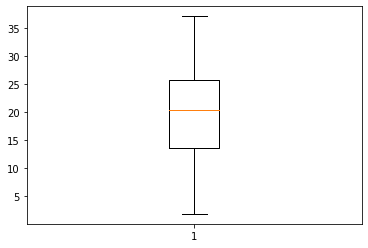

In [ ]:
plt.boxplot(elect2.ambiant_temp);

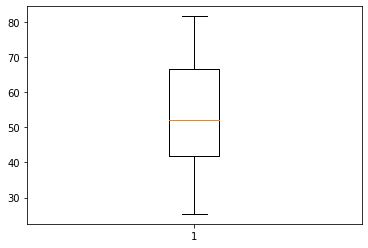

In [ ]:
plt.boxplot(elect2.volume);

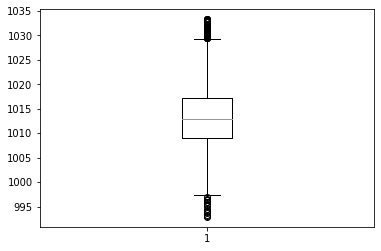

In [ ]:
plt.boxplot(elect2.ambiant_pre);

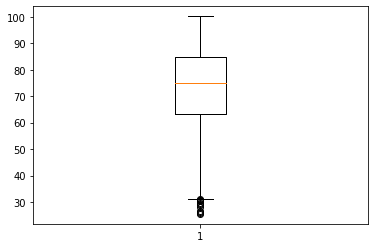

In [ ]:
plt.boxplot(elect2.relative_hum);

SCARTTER PLOT



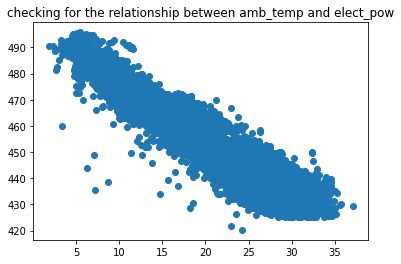

In [ ]:
plt.scatter(elect2['ambiant_temp'], elect2['elecrical_pow']) 
plt.title('checking for the relationship between amb_temp and elect_pow')
plt.show()

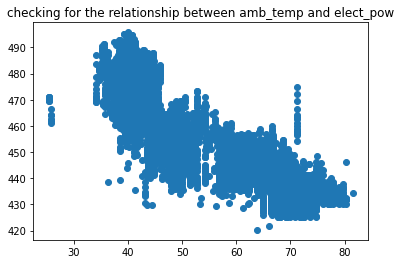

In [ ]:
plt.scatter(elect2['volume'], elect2['elecrical_pow']) 
plt.title('checking for the relationship between amb_temp and elect_pow')
plt.show()

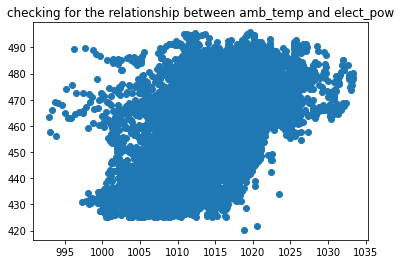

In [ ]:
plt.scatter(elect2['ambiant_pre'], elect2['elecrical_pow']) 
plt.title('checking for the relationship between amb_temp and elect_pow')
plt.show()

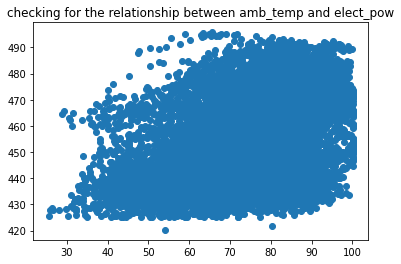

In [ ]:
plt.scatter(elect2['relative_hum'], elect2['elecrical_pow']) 
plt.title('checking for the relationship between amb_temp and elect_pow')
plt.show()

          Checking for Correlation
If you are applying a linear regression model on your dataset there is the need to check for relationship between dependent and independent variable. In a case where there is no relationship between the dependent and independent variable then there is no need to use that variable for your model building. And to avoid the issue of multicolliearity. so for this we use our heatmap to get a graphic view of how correlated our dataset are within and among variables.

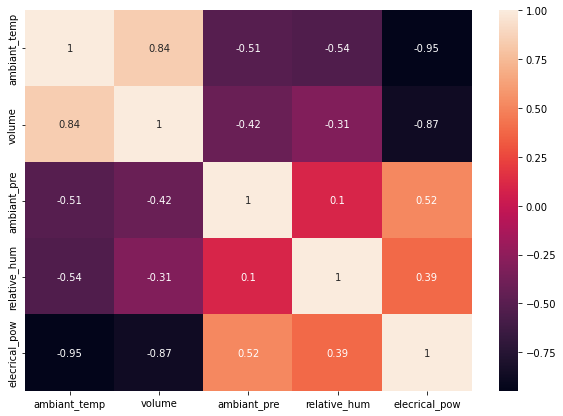

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(elect2.corr(), annot=True);



> SPLITTING DATASET


Before splitting the dataset into train, test and validation there is the need to group our independent variable into a variable as well as our dependent variable assigning each of them to X and Y where the latter is the dependent while the former is the independent.
y = rename_columns['Electrical_output']
x =         rename_columns.drop(columns=['Electrical_output'], axis=1)

In [ ]:
y = elect2.elecrical_pow
X = elect2.drop(['elecrical_pow'],axis=1)

In [ ]:
y

0       480.48
1       445.75
2       438.76
3       453.09
4       464.43
         ...  
9563    462.59
9564    432.90
9565    465.96
9566    450.93
9567    451.67
Name: elecrical_pow, Length: 9527, dtype: float64

              Scaling Data
Since most of the values in each datapoint cannot be within thesame range in real life case scenerio there is the need to scale our data within a certain range in other to avoid problem of bias because a situation where the scale between values are a bit distant the model tend to favour variable with high variable because of the high values which might not be the case in real case scenerio. So for this case using the MinMaxScaler function scale our dataset between 1 and 0, while StandardScaler scale your dataset between -1 and 1 therefore given all variable equal chance of being pick for the egression analysis

In [ ]:
scale = MinMaxScaler()
X1 = pd.DataFrame(scale.fit_transform(X))
X1

,0,1,2,3
0,0.184986,0.274199,0.444197,0.863941
1,0.618414,0.589502,0.458055,0.652011
2,0.791218,0.561210,0.352883,0.219169
3,0.488952,0.432918,0.354615,0.686729
4,0.283003,0.272242,0.599852,0.960322
...,...,...,...,...
9522,0.377054,0.419217,0.467953,0.634987
9523,0.895184,0.935765,0.430834,0.457909
9524,0.401700,0.319929,0.527345,0.711796
9525,0.448725,0.614057,0.635734,0.926139


In [ ]:
X1.shape

(9527, 4)

In [ ]:
pca = PCA(n_components=4)
pca_model = pca.fit(X1)

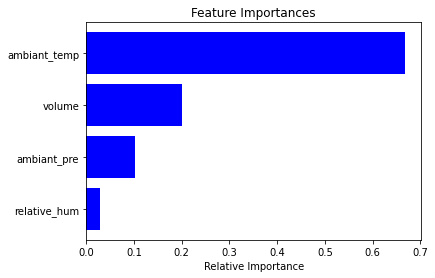

In [ ]:
features = elect2.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-4:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



> SPLITTING INTO TRAIN AND VALIDATION


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45 )

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.20, random_state=1)

The function train_test_split is used to split the data into train and test with the test size being 20% of the whole dataset while the remaining 80% is used for training the model.


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.20,random_state=42)

In [ ]:
X_train.shape

(7621, 4)

In [ ]:
y_train.shape

(7621,)

              LineaRegression
Training the linearegression model to be able to understand each and every possible feature or variable in our dataset in order to be able to predict correctly without any kind of bias.

In [ ]:
lm_model = LinearRegression()

Training the model to understand the data

In [ ]:
model = lm_model.fit(X_train,y_train)

Getting the accuracy score of our model. This show that our model has 93% of predicting a new form of data that will be feed to it, given that he understand almost all aspect of the dataset that he was feed with

In [ ]:
lm_model.score(X_train,y_train)

0.9277923887100401

In [ ]:
y_pred = model.predict(X_test)

                Model Prediction
Predicting the performance of our model to check if it really understood what he was taught from our training dataset.

In [ ]:
print('mean square error =', mean_squared_error(y_pred, y_test))
print('our mean absolute error =', mean_absolute_error(y_pred, y_test))
print('our accuracy =', r2_score(y_pred, y_test))

mean square error = 20.89278904067136
our mean absolute error = 3.662980739179561
our accuracy = 0.9235473731728513


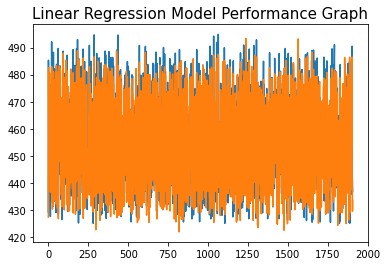

In [ ]:
#sorted_indices = pd.DataFrame(y_test.argsort())
plt.plot(np.arange(y_test.shape[0]), y_test)
plt.plot(np.arange(y_test.shape[0]), y_pred)
plt.title('Linear Regression Model Performance Graph', fontsize=15)
plt.show()

In [ ]:
r_model = Ridge(alpha = 0.8)

In [ ]:
rid_model = r_model.fit(X_train,y_train)

In [ ]:
rid_model.score(X_train,y_train)

0.927771580608545

In [ ]:
y_pred1 =  rid_model.predict(X_test)

In [ ]:
print('mean square error for Ridge regression is', mean_squared_error(y_pred1, y_test))
print('accuracy for Ridge regression is', r2_score(y_pred1,y_test))

mean square error for Ridge regression is 20.933339935485204
accuracy for Ridge regression is 0.9230671320479487


No handles with labels found to put in legend.


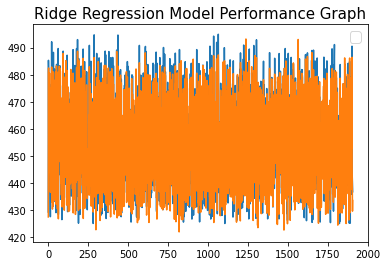

In [ ]:
sorted_indices = pd.DataFrame(y_test.argsort())
plt.plot(np.arange(y_test.shape[0]), y_test)
plt.plot(np.arange(y_test.shape[0]), y_pred1)
plt.title('Ridge Regression Model Performance Graph', fontsize=15)
plt.legend(fontsize = 14)
plt.show()

              Graph Description
The graph above show the performance of our model, which goes to show that our model is pretty impressive in predicting our test dataset.

          model Performance Selection
From the result of the Ridge and linear regression model above, in other to select the model that perform better on our dataset,  we compare the mean absolute error for both model and the one with the lower MSE is the model that will be best for training our dataset, and in these case we are going to be using the linear regression model given that it has lower MSE when compared with our Ridge Regression model. 